

## Predictive modeling of customer bookings


### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.head(30)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


In [9]:
print(df['booking_complete'].value_counts())


0    42522
1     7478
Name: booking_complete, dtype: int64


In [10]:
print(df['sales_channel'].unique())

['Internet' 'Mobile']


In [11]:
mapping2={
    'Internet':0,
    'Mobile':1
}
df['sales_channel']=df['sales_channel'].map(mapping2)

In [12]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,0,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [13]:
print(df['booking_origin'].nunique())  # Number of unique countries
print(df['booking_origin'].value_counts())  # Frequency of each

104
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64


In [14]:
#keeping top 15 countries and grouping rest as 'others'
top_countries= df['booking_origin'].value_counts().head(15).index
df['booking_origin']=df['booking_origin'].apply(

    lambda x: x if x in top_countries else 'Other'
)

In [15]:
mean_encoding= df.groupby('booking_origin')['booking_complete'].mean().to_dict()
df['booking_origin_success']=df['booking_origin'].map(mean_encoding)


In [16]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_success
0,2,0,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0.050279
1,1,0,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0.050279
2,2,0,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0.103150
3,1,0,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0.050279
4,2,0,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0.103150
5,1,0,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0,0.050279
6,3,0,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0,0.050279
7,2,0,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0,0.103150
8,1,0,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0,0.050279
9,1,1,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0,0.103150


In [17]:
print(df['trip_type'].unique())

['RoundTrip' 'CircleTrip' 'OneWay']


In [18]:
mapping3={
    'RoundTrip':2, 
    'CircleTrip':0, 
    'OneWay':1
}
df['trip_type']=df['trip_type'].map(mapping3)

In [19]:
df.drop('route', axis=1, inplace=True)

In [20]:
bin=[0,6,12,18,24]
labels=['Night','Morning','Afternoon','Evening']
df['flight_time_of_day']=pd.cut(df['flight_hour'], bins=bin, labels=labels)
df.drop('flight_hour', axis=1, inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   num_passengers          50000 non-null  int64   
 1   sales_channel           50000 non-null  int64   
 2   trip_type               50000 non-null  int64   
 3   purchase_lead           50000 non-null  int64   
 4   length_of_stay          50000 non-null  int64   
 5   flight_day              50000 non-null  int64   
 6   booking_origin          50000 non-null  object  
 7   wants_extra_baggage     50000 non-null  int64   
 8   wants_preferred_seat    50000 non-null  int64   
 9   wants_in_flight_meals   50000 non-null  int64   
 10  flight_duration         50000 non-null  float64 
 11  booking_complete        50000 non-null  int64   
 12  booking_origin_success  50000 non-null  float64 
 13  flight_time_of_day      48461 non-null  category
dtypes: category(1), float6

In [22]:
print(df[['booking_origin','booking_origin_success']])

      booking_origin  booking_origin_success
0        New Zealand                0.050279
1        New Zealand                0.050279
2              India                0.103150
3        New Zealand                0.050279
4              India                0.103150
...              ...                     ...
49995      Australia                0.050358
49996      Australia                0.050358
49997      Australia                0.050358
49998      Australia                0.050358
49999      Australia                0.050358

[50000 rows x 2 columns]


In [43]:
df.drop('booking_origin', axis=1, inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

features=[
    'num_passengers', 'sales_channel', 'purchase_lead', 
    'length_of_stay', 'flight_day',
    'wants_extra_baggage', 'wants_preferred_seat', 
    'wants_in_flight_meals', 'flight_duration', 
    'booking_origin_success'
]
X=df[features]
y=df['booking_complete']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [25]:
from sklearn.metrics import classification_report
y_pred= model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8520
           1       0.30      0.68      0.42      1480

    accuracy                           0.72     10000
   macro avg       0.61      0.70      0.61     10000
weighted avg       0.84      0.72      0.75     10000



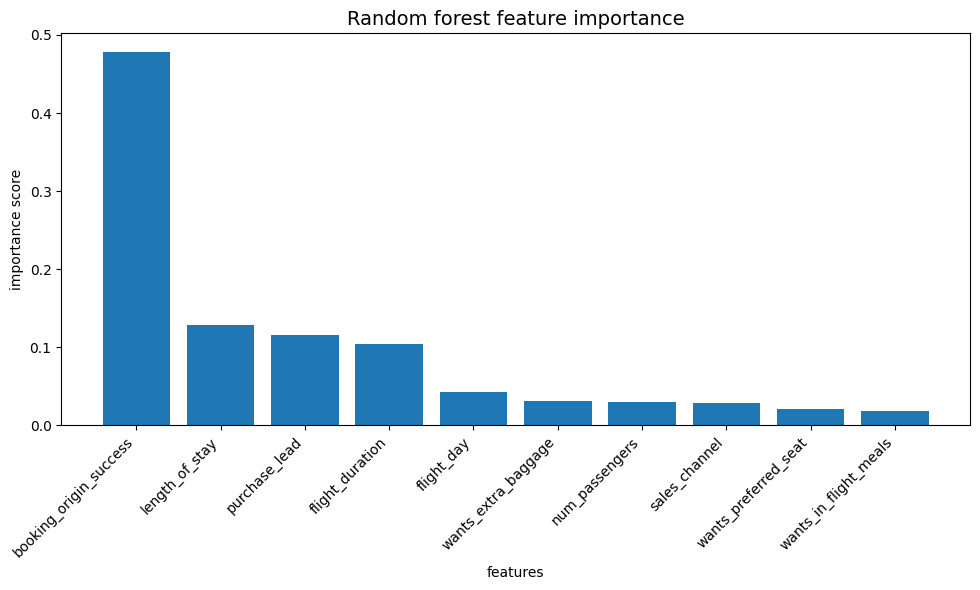

In [26]:
import matplotlib.pyplot as plt
import numpy as np
importances= model.feature_importances_
feature_names=X_train.columns

indices= np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Random forest feature importance", fontsize=14)
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color='#1f77b4')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation= 45, ha= 'right')
plt.xlabel('features')
plt.ylabel('importance score')
plt.tight_layout()
plt.show()

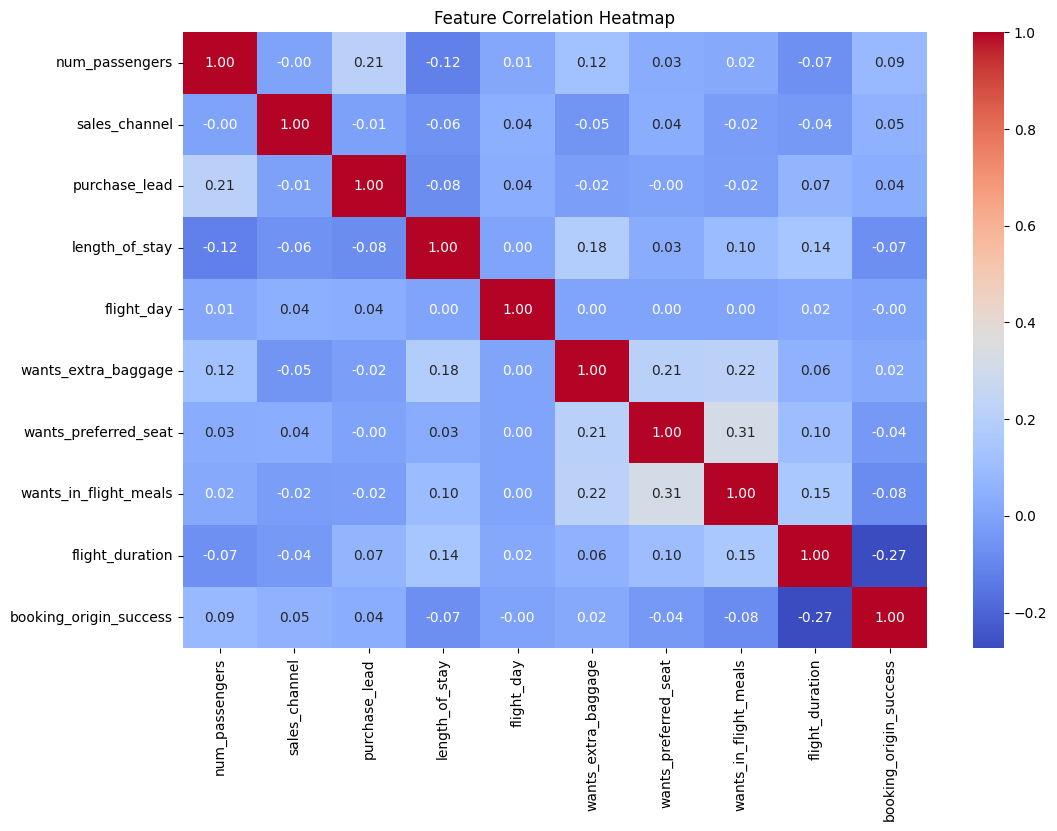

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [28]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global importance)
shap.summary_plot(shap_values[1], X_test, feature_names=feature_names, plot_type="bar")

C:\Users\nasla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [124]:
pip install --upgrade numpy==1.24.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\nasla\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [96]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get predicted probabilities for class 1
y_probs = model.predict_proba(X_test)[:, 1]  

# Find threshold that maximizes F1-score (or choose based on business needs)
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply new threshold
y_pred = (y_probs >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      8520
           1       0.33      0.61      0.43      1480

    accuracy                           0.76     10000
   macro avg       0.63      0.70      0.64     10000
weighted avg       0.83      0.76      0.79     10000



In [93]:
model = RandomForestClassifier(
    class_weight={0:1, 1:2}, 
    min_samples_leaf=10,      # Reduce overfitting
    max_features='sqrt',      # Better generalization
    n_estimators=300
)

model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, min_samples_leaf=10,
                       n_estimators=300)

In [94]:
from sklearn.metrics import classification_report
y_pred= model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8520
           1       0.45      0.22      0.29      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.59      0.60     10000
weighted avg       0.81      0.84      0.82     10000



In [98]:
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      8520
           1       0.31      0.62      0.42      1480

    accuracy                           0.74     10000
   macro avg       0.62      0.69      0.63     10000
weighted avg       0.83      0.74      0.77     10000



In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)  # Retrain on balanced data

RandomForestClassifier(class_weight='balanced')

In [61]:
from sklearn.metrics import classification_report
y_pred= model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8520
           1       0.35      0.29      0.32      1480

    accuracy                           0.81     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.80      0.81      0.81     10000



In [108]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
new_threshold = 0.3  # Experiment with values (0.2-0.4)
y_pred = (y_probs >= new_threshold).astype(int)
print(classification_report(y_test, y_pred))  # Check recall improvement

              precision    recall  f1-score   support

           0       0.95      0.54      0.69      8520
           1       0.24      0.82      0.37      1480

    accuracy                           0.58     10000
   macro avg       0.59      0.68      0.53     10000
weighted avg       0.84      0.58      0.64     10000



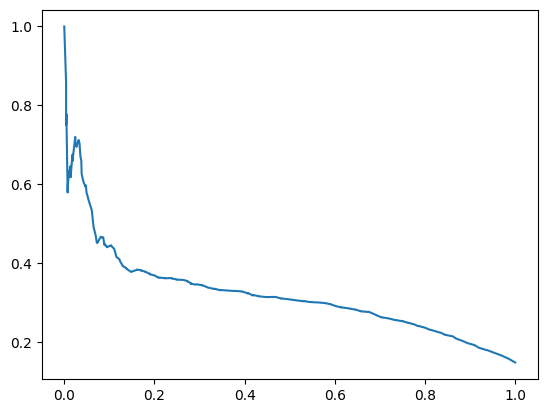

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision)

In [103]:
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=5)  # Weight for class 1
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      8520
           1       0.30      0.62      0.40      1480

    accuracy                           0.73     10000
   macro avg       0.61      0.68      0.61     10000
weighted avg       0.83      0.73      0.76     10000



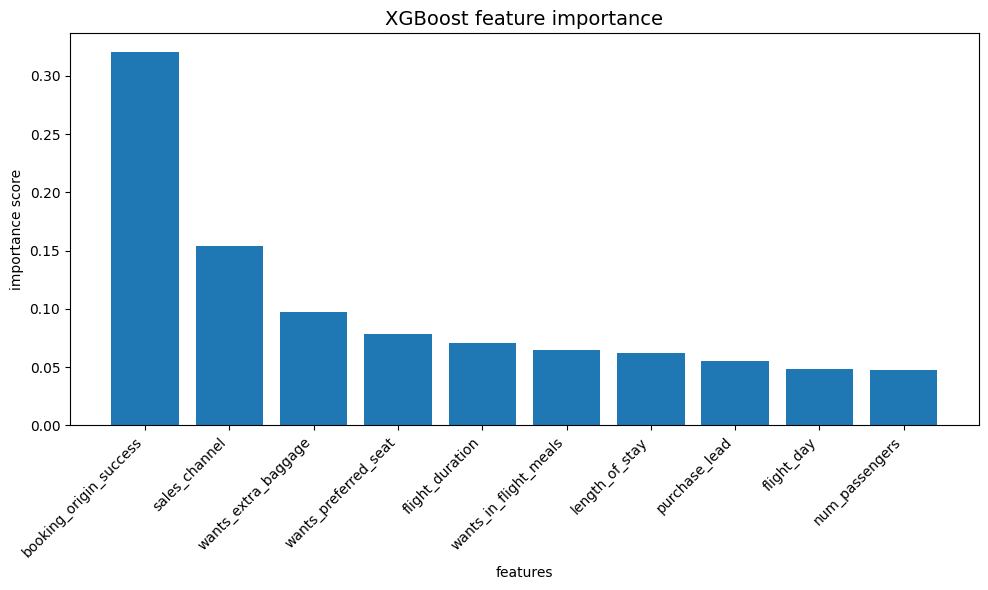

In [109]:
importances= model.feature_importances_
feature_names=X_train.columns

indices= np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("XGBoost feature importance", fontsize=14)
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color='#1f77b4')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation= 45, ha= 'right')
plt.xlabel('features')
plt.ylabel('importance score')
plt.tight_layout()
plt.show()